In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare(name: str):
    def parse(_name: str):
        with open(_name, 'r') as f:
            ln = f.readlines()
            
        d = {}
        for line in ln:
            idx = line.index('#')
            key = line[:idx]
            val = float(line[idx+1:])
            
            d[key] = val
        
        return d
    
    print(name)
    before_name = 'before-' + name
    after_name = 'after-' + name
    
    d_before = parse(before_name)
    d_after = parse(after_name)
    diff = []
    
    for key in d_before:
        assert key in d_after
        
        tb = d_before[key]
        ta = d_after[key]
        
        diff.append(ta/tb)
        
        if ta / tb > 1.2:
            print(f'(*shape, k, dim)={key.rstrip()},  time after ={ta : .3f} ms,  '
                  f'time before ={tb : .3f} ms,  '
                  f'slow down{ta/tb : .3f}')
    
    ax = sns.distplot(diff, bins=40)
    ax.set(xlabel='time after / time before (smaller is better)', ylabel='PDF', xlim=(0, 1.5))
    plt.show()

cuda-torch.float32.txt
(*shape, k, dim)=(3, 50000, 1, 10, 1),  time after = 0.356 ms,  time before = 0.295 ms,  slow down 1.206
(*shape, k, dim)=(1, 50000, 10, -1),  time after = 0.384 ms,  time before = 0.307 ms,  slow down 1.250
(*shape, k, dim)=(1171237, 3, 50, 0),  time after = 10.963 ms,  time before = 8.525 ms,  slow down 1.286
(*shape, k, dim)=(10, 1171237, 3, 1, 1),  time after = 12.682 ms,  time before = 9.543 ms,  slow down 1.329
(*shape, k, dim)=(1, 2529899, 1, 1, 1),  time after = 16.293 ms,  time before = 12.684 ms,  slow down 1.285
(*shape, k, dim)=(3298121, 1, 100, 0),  time after = 31.510 ms,  time before = 25.898 ms,  slow down 1.217
(*shape, k, dim)=(10, 2529899, 1, 100, 1),  time after = 28.677 ms,  time before = 23.150 ms,  slow down 1.239
(*shape, k, dim)=(3, 50000, 10, 1, 1),  time after = 0.696 ms,  time before = 0.559 ms,  slow down 1.245
(*shape, k, dim)=(1, 1863557, 3, 50, 1),  time after = 17.978 ms,  time before = 14.604 ms,  slow down 1.231
(*shape, k, dim)

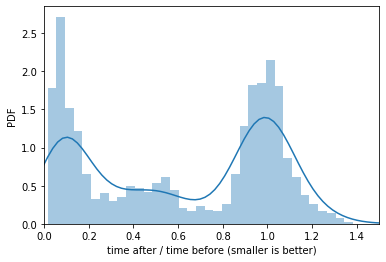

In [24]:
compare('cuda-torch.float32.txt')